### 🖥️분류 (Classification) 프로젝트 1
#### 🍕비만 수준 예측

#### ✏️feature

- Age: 나이
- Gender: 성별
- Height: 키(m)
- Weight: 체중(kg)
- CALC: 음주 빈도
- FAVC: 고칼로리 음식을 자주 섭취하는지 여부
- FCVC: 채소를 자주 섭취하는지 여부
- NCP: 일일 식사 횟수
- SCC: 하루 섭취 칼로리를 체크하는지 여부
- SMOKE: 흡연 여부
- CH20: 일일 물 섭취량(L)
- family_history_with_overweight: 가족 구성원 중 과체중 유무
- FAF: 신체 활동을 얼마나 자주 하는지
- TUE: 전자기기 사용량(시간)
- CAEC: 간식 섭취 여부
- MTRANS: 주로 이용하는 교통수단

#### 🎈target

- NObeyesdad: 비만 수준(Insufficient Weight(저체중), Normal Weight(정상 체중), Overweight Level I(과체중 1단계), Overweight Level II(과체중 2단계), Obesity Type I(비만 1단계), Obesity Type II(비만 2단계), Obesity Type III(비만 3단계)

### 목차

1. 데이터 탐색 및 분포 시각화
2. 데이터 전처리 및 훈련/학습 데이터 분리
3. 모델 훈련, 예측 및 평가
   - DTC
   - SVC
   - KNN
   - Ensemble(Hard/soft Voting[DTC, SVC, KNN], Bagging[RFC], Boosting[AdaBoost, GBM, XGB, LightGBM])
4. 정확도 및 F1 score 비교 분석

#### 1. 데이터 탐색 및 분포 시각화

- 중복행, 결측치 검사
- 분포 시각화, 상관관계 확인 및 이상치 검사

- 데이터를 읽어옵니다.

In [22]:
import pandas as pd

o_df = pd.read_csv("./datasets/obesity_dataset.csv", low_memory=False)
o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


- 데이터의 정보를 확인해봅니다.

In [23]:
o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

- 중복행을 검사합니다.

In [24]:
o_df.duplicated().sum()

24

- 중복행을 제거합니다.

In [25]:
o_df.drop_duplicates(inplace=True)
o_df.duplicated().sum()

0

- 결측치를 검사합니다.

In [26]:
o_df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- 히스토그램을 통해 수치형 데이터를 가진 각 feature별 분포를 확인해봅니다.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

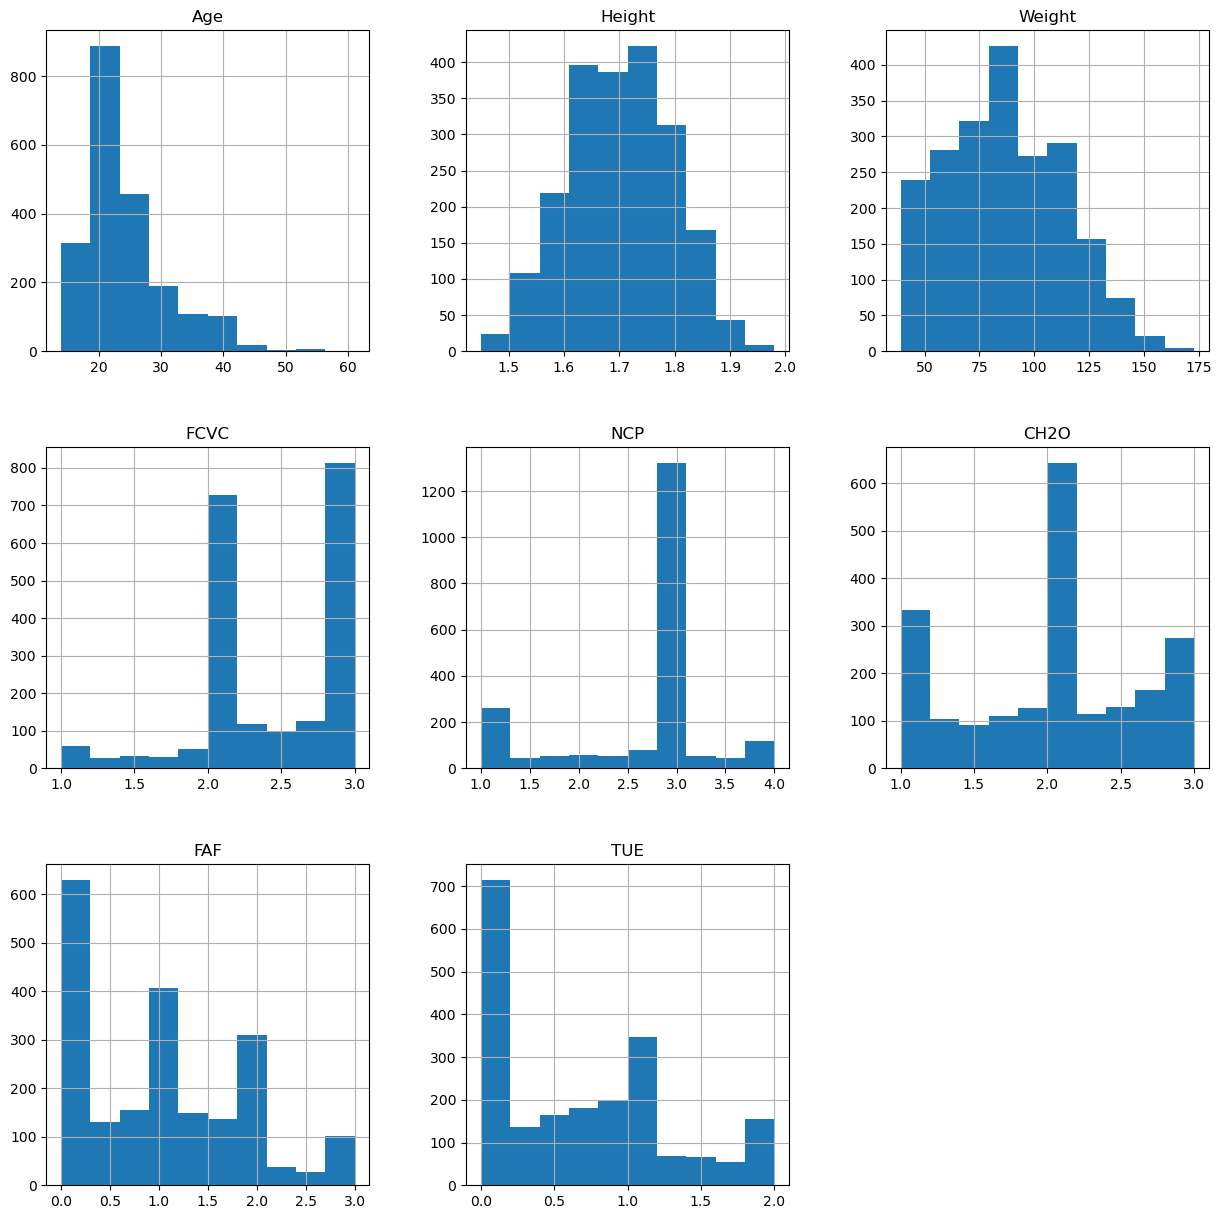

In [27]:
o_df.hist(figsize=(15, 15))

#### 2. 데이터 전처리 및 훈련/학습 데이터 분리

- NObeyesdad 컬럼의 이름을 target으로 변경합니다.
- target에 레이블 인코딩을 적용합니다.
- 마찬가지로 범주형 데이터를 가진 feature들에 대하여 레이블 인코딩을 진행합니다.
- target과의 상관관계를 확인합니다.
- train_test_split()을 통해 훈련 및 학습 데이터를 분리합니다.
- 훈련 데이터에서 target의 분포를 확인하여 필요 시 under/oversampling을 진행합니다.

- 먼저 원본 데이터 프레임을 복사하여 전처리를 진행합니다.

In [28]:
pre_o_df = o_df.copy()
pre_o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


- target 컬럼의 이름을 변경합니다.

In [29]:
pre_o_df = pre_o_df.rename(columns={'NObeyesdad': 'target'})
pre_o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,target
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


- target 에 레이블 인코딩을 적용합니다.

In [30]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
targets = target_encoder.fit_transform(pre_o_df['target'])
pre_o_df['target'] = targets
pre_o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,target
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,1
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,1
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,1
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,5
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,4
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,4
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,4
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,4


In [31]:
print(target_encoder.classes_)

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


- 마찬가지로 범주형 데이터를 가진 feature에 대하여 레이블 인코딩을 진행합니다.

In [32]:
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
encoders = dict()

for column in categorical_columns:
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(pre_o_df[column])
    pre_o_df[column] = encoded_column
    encoders[column] = encoder

pre_o_df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,target
0,21.000000,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3,1
1,21.000000,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3,1
2,23.000000,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3,1
3,27.000000,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4,5
4,22.000000,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3,4
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3,4
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3,4
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3,4


In [33]:
for column, encoder in encoders.items():
    print(f'{column}: {encoder.classes_}')

Gender: ['Female' 'Male']
CALC: ['Always' 'Frequently' 'Sometimes' 'no']
FAVC: ['no' 'yes']
SCC: ['no' 'yes']
SMOKE: ['no' 'yes']
family_history_with_overweight: ['no' 'yes']
CAEC: ['Always' 'Frequently' 'Sometimes' 'no']
MTRANS: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']


- target과의 상관관계를 확인합니다.

In [34]:
corr = pre_o_df.corr()
corr

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,target
Age,1.000000,0.050641,-0.031748,0.198160,-0.045565,0.063895,0.013572,-0.055823,-0.117959,0.091261,-0.044058,0.200379,-0.148202,-0.302927,0.092097,-0.601476,0.238308
Gender,0.050641,1.000000,0.626748,0.163176,0.010574,0.061220,-0.271575,0.077863,-0.102435,0.045501,0.095129,0.113492,0.189471,0.022356,0.074564,-0.139044,0.014699
Height,-0.031748,0.626748,1.000000,0.457468,-0.135756,0.180694,-0.040363,0.227806,-0.137078,0.054326,0.220487,0.232258,0.293584,0.041808,0.058001,-0.068258,0.038700
Weight,0.198160,0.163176,0.457468,1.000000,-0.211351,0.274655,0.216574,0.092149,-0.205409,0.024369,0.203823,0.492969,-0.056490,-0.079351,0.300271,0.009836,0.388802
CALC,-0.045565,0.010574,-0.135756,-0.211351,1.000000,-0.087661,-0.063132,-0.082985,-0.004175,-0.083181,-0.085460,0.028403,0.086825,0.041830,-0.039502,-0.009828,-0.132821
FAVC,0.063895,0.061220,0.180694,0.274655,-0.087661,1.000000,-0.025419,-0.006398,-0.191277,-0.050713,0.002993,0.214329,-0.111184,0.071505,0.147921,-0.069422,0.041023
FCVC,0.013572,-0.271575,-0.040363,0.216574,-0.063132,-0.025419,1.000000,0.034885,0.071179,0.013716,0.081332,0.033199,0.022003,-0.104128,-0.038565,0.069012,0.025728
NCP,-0.055823,0.077863,0.227806,0.092149,-0.082985,-0.006398,0.034885,1.000000,-0.020461,0.005009,0.075335,0.028411,0.127816,0.015693,-0.072316,-0.043648,-0.088235
SCC,-0.117959,-0.102435,-0.137078,-0.205409,-0.004175,-0.191277,0.071179,-0.020461,1.000000,0.047384,0.009325,-0.193947,0.073768,-0.012875,-0.109393,0.044381,-0.050936
SMOKE,0.091261,0.045501,0.054326,0.024369,-0.083181,-0.050713,0.013716,0.005009,0.047384,1.000000,-0.031642,0.014885,0.010811,0.016491,-0.054960,-0.009995,-0.023341


In [35]:
corr['target'].sort_values(ascending=False)[1:]

Weight                            0.388802
family_history_with_overweight    0.330391
CAEC                              0.314510
Age                               0.238308
CH2O                              0.092616
FAVC                              0.041023
Height                            0.038700
FCVC                              0.025728
Gender                            0.014699
SMOKE                            -0.023341
MTRANS                           -0.047784
SCC                              -0.050936
TUE                              -0.064876
NCP                              -0.088235
CALC                             -0.132821
FAF                              -0.135192
Name: target, dtype: float64

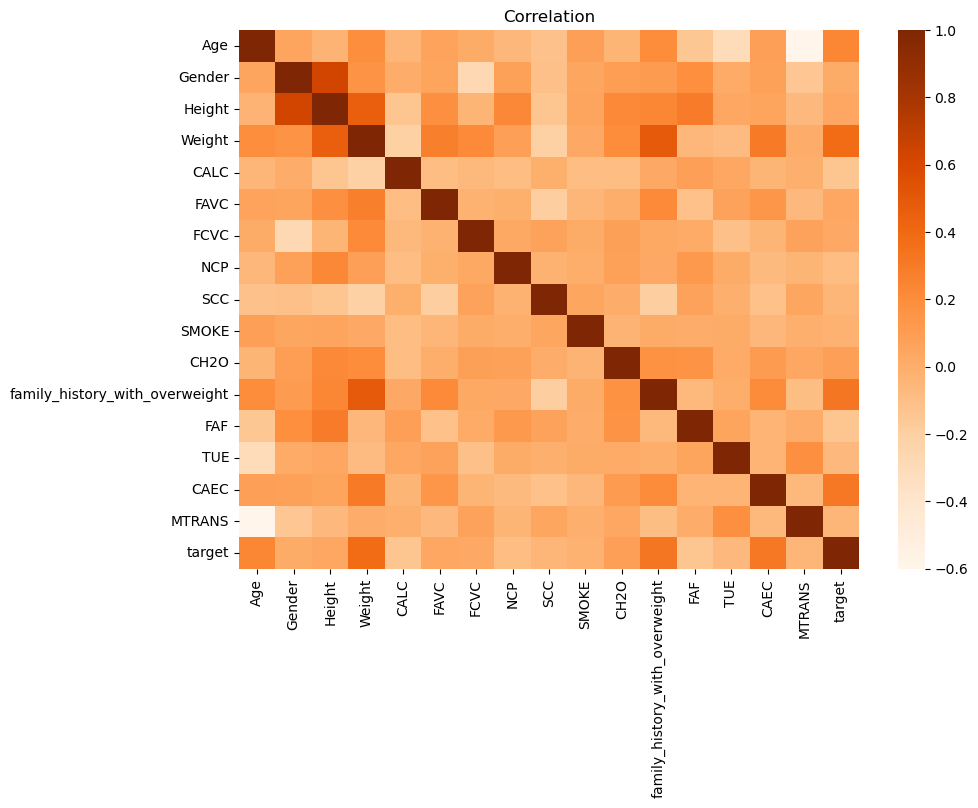

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(corr, cmap='Oranges')
heatmap.set_title('Correlation')
plt.show()

- 나이, 체중, 가족 중 과체중 여부, 간식 섭취 여부 등이 target과 양의 상관관계를 나타내고 있음을 알 수 있습니다.

- target(종속 변수)을 제외한 feature(독립 변수)들 사이의 상관관계를 시각화해봅니다.

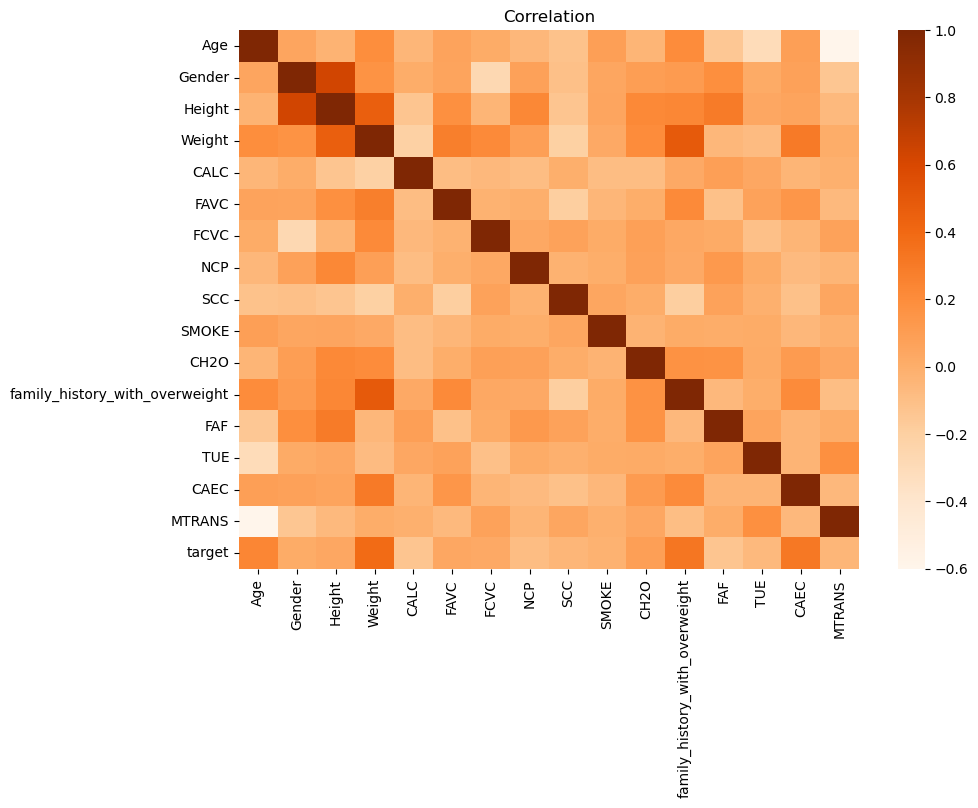

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 7))
feature_corr = corr.iloc[:, :-1]
heatmap = sns.heatmap(feature_corr, cmap='Oranges')
heatmap.set_title('Correlation')
plt.show()

- train_test_split()을 통해 훈련 및 테스트 데이터를 분리합니다.

In [38]:
from sklearn.model_selection import train_test_split

features, targets = pre_o_df.iloc[:, :-1], pre_o_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

- target 데이터의 비중을 확인해봅니다.

In [39]:
pre_o_df['target'].value_counts()

target
2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: count, dtype: int64

- 대체로 비슷한 분포를 보이므로 우선 샘플링을 진행하지 않고 훈련 및 예측을 수행해봅니다.

In [40]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [41]:
# y_train_over.value_counts()

---
#### 3. 모델 훈련, 예측 및 평가
- DTC  
- SVC  
- KNN  
- Ensemble(Hard/soft Voting[DTC, SVC, KNN], Bagging[RFC], Boosting[AdaBoost, GBM, XGB, LightGBM])
- 각각 GridSearchCV를 통해 최적의 하이퍼 파라미터 탐색을 동시에 진행합니다.

##### 1) DTC(Decision Tree Classifier) 분류 모델

- 먼저 GridSearchCV를 확인하기 전, 하이퍼 파라미터 조정 없이 DTC를 통해 훈련 및 예측을 수행한 후 feature별 중요도를 시각화해봅니다.

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [43]:
from sklearn.metrics import accuracy_score

prediction = dtc.predict(X_test)
print(f'정확도: {round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 92.823%


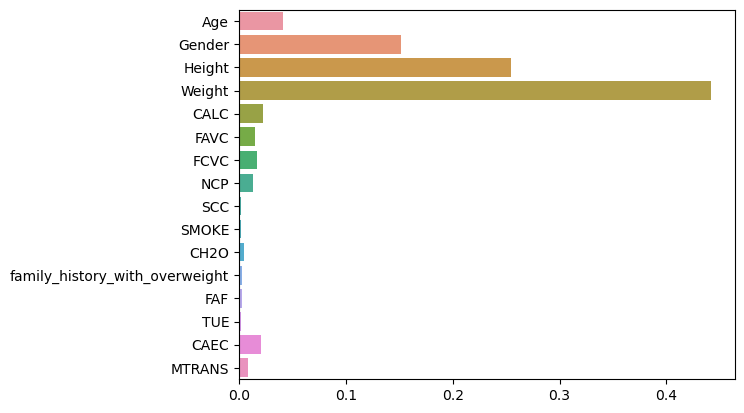

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

- 중요도가 가장 높은 상위 2개 feature(Weight, Height)를 산점도로 시각화해봅니다.

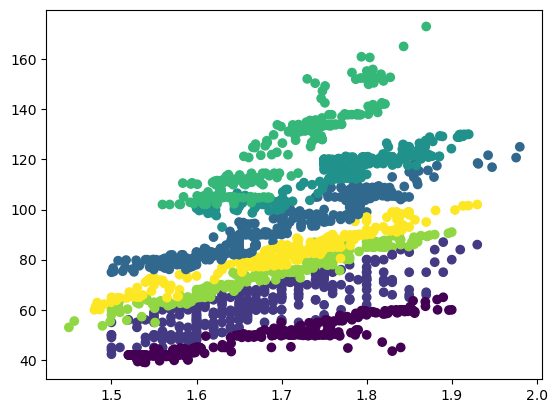

In [45]:
plt.scatter(features.iloc[:, 2], features.iloc[:, 3], c=targets)
plt.show()

- 결정 경계를 시각화해봅니다.

In [46]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


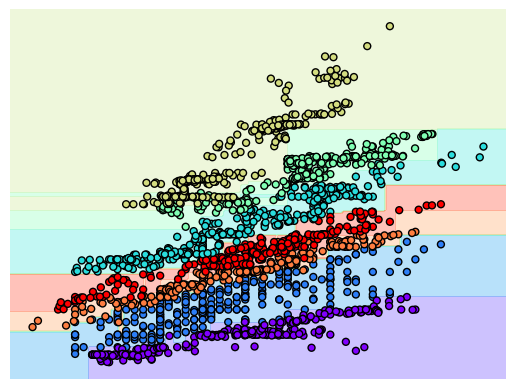

In [47]:
from copy import deepcopy

features_dtc = deepcopy(dtc)
features_2_3 = features.iloc[:, [2, 3]]
visualize_boundary(features_dtc, features_2_3, targets)

- 과적합이 발생했다고 판단하여, GridSearchCV를 통해 최적의 하이퍼 파라미터 값을 찾아 조정하고자 합니다.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameters = {
    'max_depth': [5, 6, 7],
    'min_samples_split': [7, 8, 9]
}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [7, 8, 9]},
             return_train_score=True)

In [49]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 7}",0.803255,9
1,"{'max_depth': 5, 'min_samples_split': 8}",0.803763,8
2,"{'max_depth': 5, 'min_samples_split': 9}",0.803764,7
3,"{'max_depth': 6, 'min_samples_split': 7}",0.887151,2
4,"{'max_depth': 6, 'min_samples_split': 8}",0.883592,4
5,"{'max_depth': 6, 'min_samples_split': 9}",0.883083,5
6,"{'max_depth': 7, 'min_samples_split': 7}",0.889183,1
7,"{'max_depth': 7, 'min_samples_split': 8}",0.882574,6
8,"{'max_depth': 7, 'min_samples_split': 9}",0.884100,3


In [50]:
dtc = g_dtc.best_estimator_

In [51]:
from sklearn.metrics import accuracy_score

prediction = dtc.predict(X_test)
print(f'정확도: {round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 90.9091%


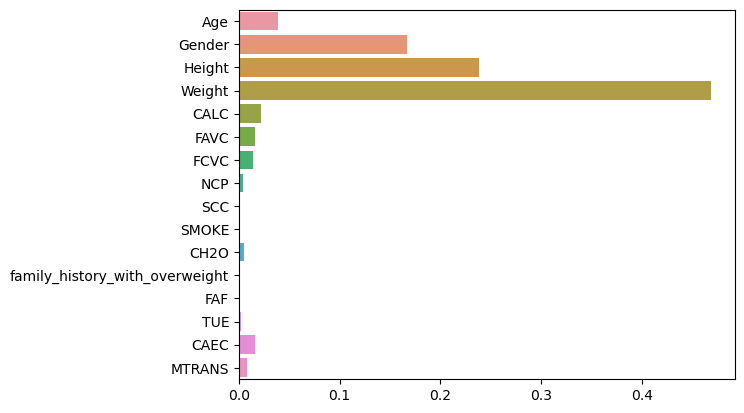

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

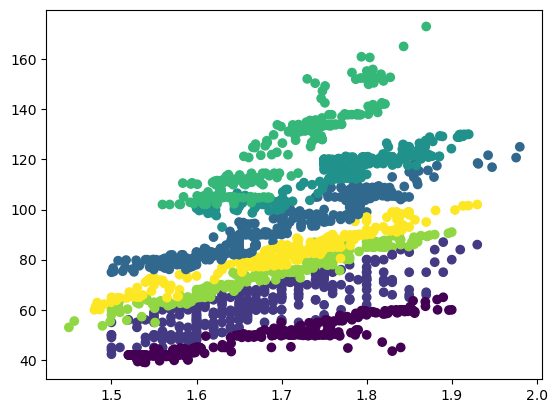

In [53]:
plt.scatter(features.iloc[:, 2], features.iloc[:, 3], c=targets)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


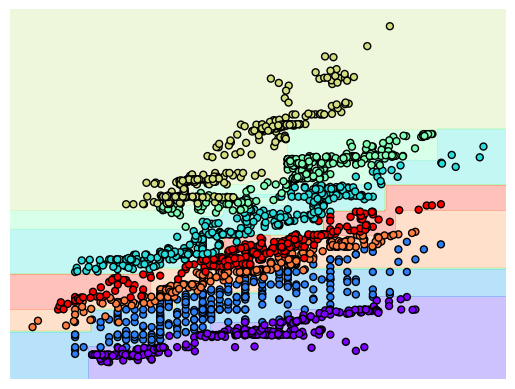

In [54]:
from copy import deepcopy

features_dtc = deepcopy(dtc)
features_2_3 = features.iloc[:, [2, 3]]
visualize_boundary(features_dtc, features_2_3, targets)

- 여전히 과적합이 발생했다고 판단되어 best_estimator_를 사용하지 않고 직접 하이퍼 파라미터를 조정하여 진행합니다.

In [55]:
dtc = DecisionTreeClassifier(max_depth=6, min_samples_split=7)
dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=6, min_samples_split=7)

In [56]:
from sklearn.metrics import accuracy_score

prediction = dtc.predict(X_test)
print(f'정확도: {round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 90.4306%


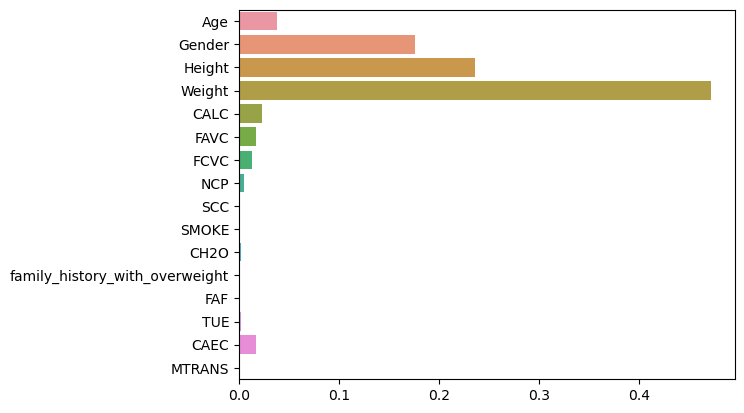

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

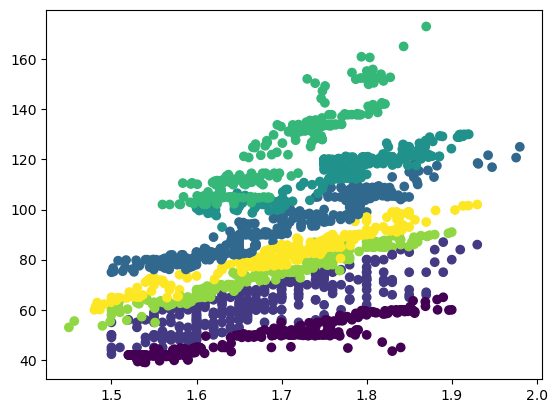

In [58]:
plt.scatter(features.iloc[:, 2], features.iloc[:, 3], c=targets)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


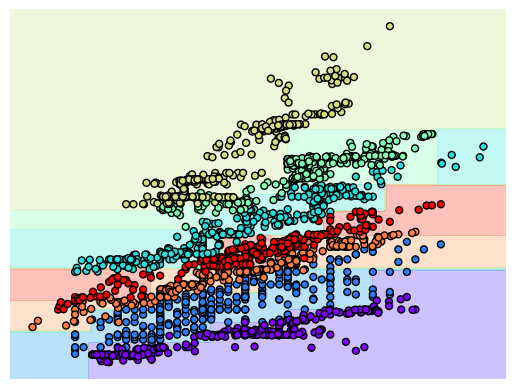

In [59]:
from copy import deepcopy

features_dtc = deepcopy(dtc)
features_2_3 = features.iloc[:, [2, 3]]
visualize_boundary(features_dtc, features_2_3, targets)

- 각 DTC 모델 별 결정 경계를 시각화한 이미지입니다.

<img src="./images/obesity_dtc_boundary01.png"><img src="./images/obesity_dtc_boundary02.png"><img src="./images/obesity_dtc_boundary03.png">

- 오차 행렬을 시각화해봅니다.

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [61]:
dtc_prediction = dtc.predict(X_test)

오차 행렬
[[52  1  0  0  0  0  0]
 [ 3 41  0  0  0 13  0]
 [ 0  0 67  0  0  2  1]
 [ 0  0  2 57  0  0  1]
 [ 0  0  0  1 64  0  0]
 [ 0  2  0  0  0 52  1]
 [ 0  0  1  0  0 12 45]]
정확도: 0.9043, 정밀도: 0.9161, 재현율: 0.9019, F1: 0.9022
################################################################################


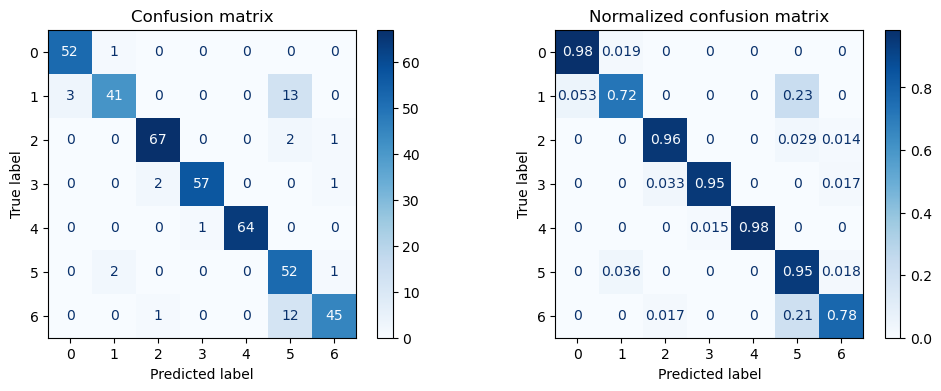

In [62]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)

##### 2) SVC(Support Vector machine Classifier) 분류 모델

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

svc = SVC(probability=True, verbose=2)

g_svc = GridSearchCV(svc, param_grid=svc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_svc.fit(X_train_over, y_train_over)

[LibSVM]

GridSearchCV(cv=3, estimator=SVC(probability=True, verbose=2), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True)

In [64]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

,params,mean_test_score,rank_test_score
0,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.640577,45
1,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.285252,61
2,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.640577,45
3,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.289319,58
4,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.640577,45
...,...,...,...
67,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.795656,32
68,"{'C': 100, 'gamma': 10, 'kernel': 'linear'}",0.957812,1
69,"{'C': 100, 'gamma': 10, 'kernel': 'rbf'}",0.489623,53
70,"{'C': 100, 'gamma': 100, 'kernel': 'linear'}",0.957812,1


- C가 100, gamma가 10 또는 100, kernel이 linear일 때 가장 좋은 성능을 보였음을 알 수 있습니다.

In [65]:
svc = g_svc.best_estimator_
svc_prediction = svc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[53  0  0  0  0  0  0]
 [ 3 53  0  0  0  1  0]
 [ 0  0 69  0  0  0  1]
 [ 0  0  2 58  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  0  0  0  0 53  2]
 [ 0  0  2  0  0  5 51]]
정확도: 0.9617, 정밀도: 0.9621, 재현율: 0.9607, F1: 0.9607
################################################################################


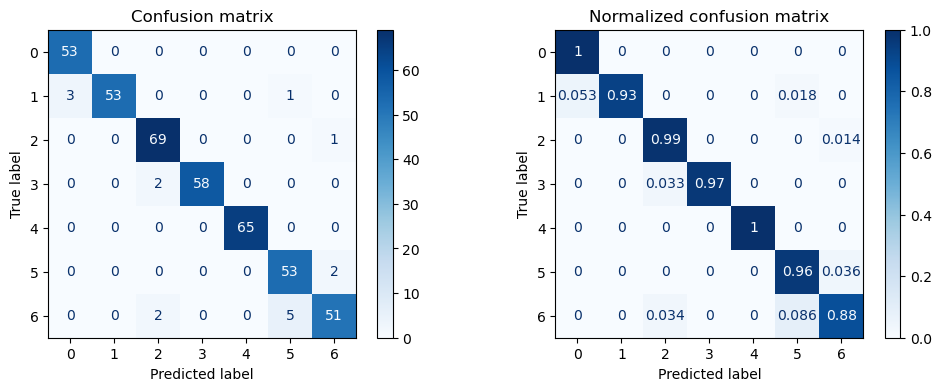

In [66]:
get_evaluation(y_test, svc_prediction, svc, X_test)

##### 3) KNN(K-Nearest Neighbors) 분류 모델

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': [3, 5, 7]
}

g_knn = GridSearchCV(knn, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [68]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.909007,1
1,{'n_neighbors': 5},0.886138,2
2,{'n_neighbors': 7},0.863772,3


In [69]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[53  0  0  0  0  0  0]
 [13 28  1  0  0 13  2]
 [ 0  0 65  1  1  0  3]
 [ 0  0  2 55  2  0  1]
 [ 0  0  0  0 65  0  0]
 [ 0  0  2  0  0 51  2]
 [ 0  2  3  1  0  2 50]]
정확도: 0.8780, 정밀도: 0.8832, 재현율: 0.8751, F1: 0.8666
################################################################################


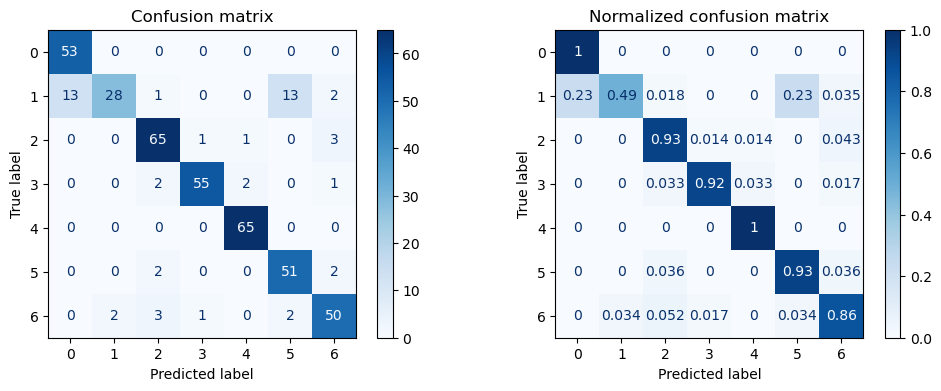

In [70]:
get_evaluation(y_test, knn_prediction, knn, X_test)

##### 4) Ensemble - RandomForestClassifier(Bagging)

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {
    'max_depth': [10, 11, 12],
    'min_samples_split': [10, 11, 12]
}

rfc = RandomForestClassifier(n_estimators=50)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_rfc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [10, 11, 12]},
             return_train_score=True)

In [72]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 10}",0.942561,7
1,"{'max_depth': 10, 'min_samples_split': 11}",0.941035,8
2,"{'max_depth': 10, 'min_samples_split': 12}",0.942562,5
3,"{'max_depth': 11, 'min_samples_split': 10}",0.945103,4
4,"{'max_depth': 11, 'min_samples_split': 11}",0.945104,3
5,"{'max_depth': 11, 'min_samples_split': 12}",0.942562,5
6,"{'max_depth': 12, 'min_samples_split': 10}",0.940021,9
7,"{'max_depth': 12, 'min_samples_split': 11}",0.946126,2
8,"{'max_depth': 12, 'min_samples_split': 12}",0.947641,1


In [73]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[51  2  0  0  0  0  0]
 [ 1 54  0  0  0  1  1]
 [ 0  0 69  0  0  0  1]
 [ 0  1  0 59  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  4  0  0  0 46  5]
 [ 0  7  1  0  0  2 48]]
정확도: 0.9378, 정밀도: 0.9389, 재현율: 0.9347, F1: 0.9353
################################################################################


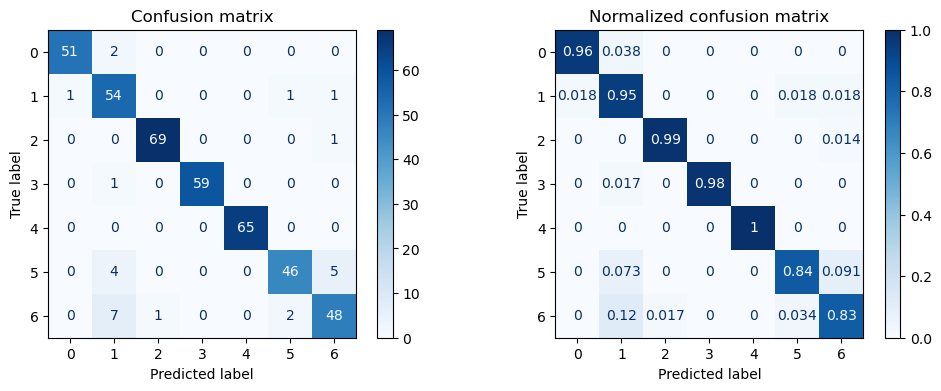

In [74]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

##### 5) Ensemble - VotingClassifier(Voting)
- (1) Hard Voting

In [75]:
from sklearn.ensemble import VotingClassifier

hard_vc = VotingClassifier(estimators=[
    ('dtc', dtc), ('svc', svc), ('knn', knn)
], voting='hard', n_jobs=-1)

hard_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=6,
                                                     min_samples_split=7)),
                             ('svc',
                              SVC(C=100, gamma=0.001, kernel='linear',
                                  probability=True, verbose=2)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 n_jobs=-1)

In [76]:
hard_vc_prediction = hard_vc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[53  0  0  0  0  0  0]
 [ 4 47  0  0  0  6  0]
 [ 0  0 70  0  0  0  0]
 [ 0  0  2 58  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  1  1  0  0 53  0]
 [ 0  1  3  0  0  2 52]]
정확도: 0.9522, 정밀도: 0.9541, 재현율: 0.9502, F1: 0.9502
################################################################################


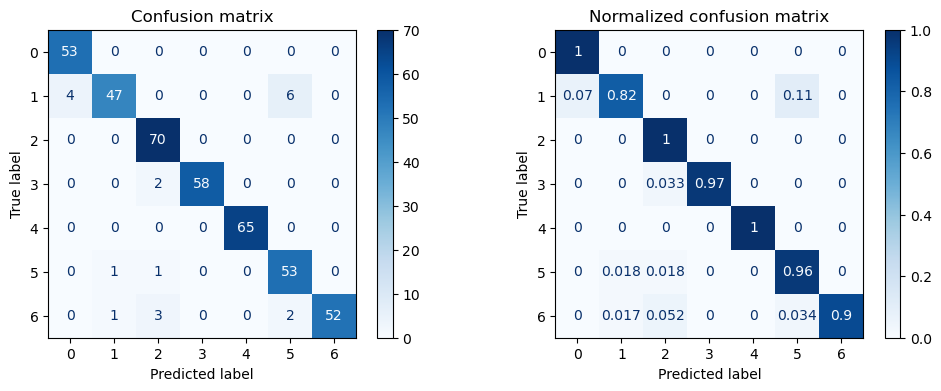

In [77]:
get_evaluation(y_test, hard_vc_prediction, hard_vc, X_test)

- (2) Soft Voting

In [78]:
from sklearn.ensemble import VotingClassifier

soft_vc = VotingClassifier(estimators=[
    ('dtc', dtc), ('svc', svc), ('knn', knn)
], voting='soft', n_jobs=-1)

soft_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=6,
                                                     min_samples_split=7)),
                             ('svc',
                              SVC(C=100, gamma=0.001, kernel='linear',
                                  probability=True, verbose=2)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 n_jobs=-1, voting='soft')

In [79]:
soft_vc_prediction = soft_vc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[53  0  0  0  0  0  0]
 [ 4 47  0  0  0  6  0]
 [ 0  0 70  0  0  0  0]
 [ 0  0  1 58  0  0  1]
 [ 0  0  0  0 65  0  0]
 [ 0  0  0  0  0 54  1]
 [ 0  0  1  0  0  1 56]]
정확도: 0.9641, 정밀도: 0.9647, 재현율: 0.9627, F1: 0.9619
################################################################################


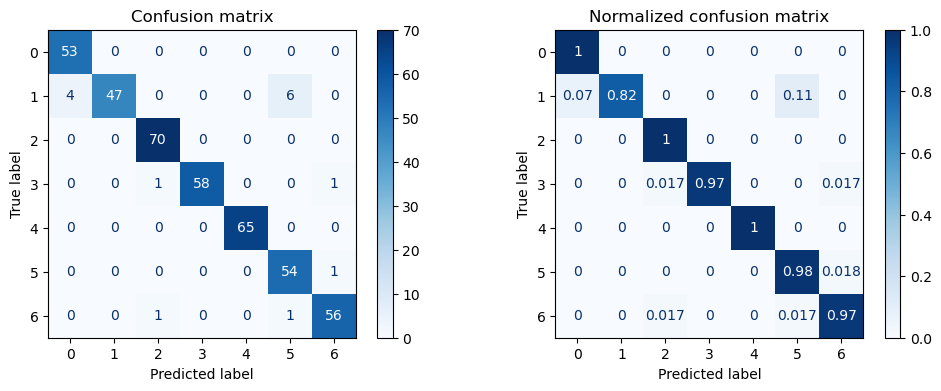

In [80]:
get_evaluation(y_test, soft_vc_prediction, soft_vc, X_test)

##### 6) Ensemble - AdaBoostClassifier(Boosting)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [82]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.291287,10
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.336543,7
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.366029,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.331468,8
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.371132,1
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.360961,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.340623,6
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.344691,5
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.357912,4
9,"{'learning_rate': 1, 'n_estimators': 50}",0.294361,9


In [83]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

- 오차 행렬을 시각화해봅니다.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[ 0 29  0  0  0 24  0]
 [ 0 19  0  0  0 31  7]
 [ 0  0 61  0  0  0  9]
 [ 0  0 46  0  0  0 14]
 [ 0  0 64  0  0  0  1]
 [ 0  1  0  0  0 25 29]
 [ 0  0  3  0  0  4 51]]
정확도: 0.3732, 정밀도: 0.2136, 재현율: 0.3627, F1: 0.2603
################################################################################


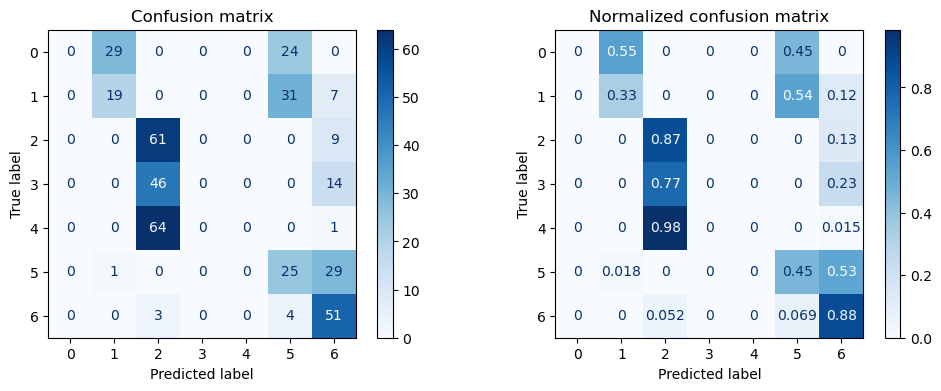

In [84]:
get_evaluation(y_test, ada_prediction, ada, X_test)

##### 7) Ensemble - GradientBoostingClassifier(Boosting)

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbm_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [86]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.963913,11
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.971540,1
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.966961,6
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.963914,10
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.966965,5
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.968999,4
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.964933,7
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.970521,2
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.970016,3
9,"{'learning_rate': 1, 'n_estimators': 50}",0.959337,12


In [87]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[53  0  0  0  0  0  0]
 [ 2 53  0  0  0  2  0]
 [ 0  0 70  0  0  0  0]
 [ 0  0  1 59  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  2  0  0  0 53  0]
 [ 0  0  1  0  0  0 57]]
정확도: 0.9785, 정밀도: 0.9781, 재현율: 0.9777, F1: 0.9778
################################################################################


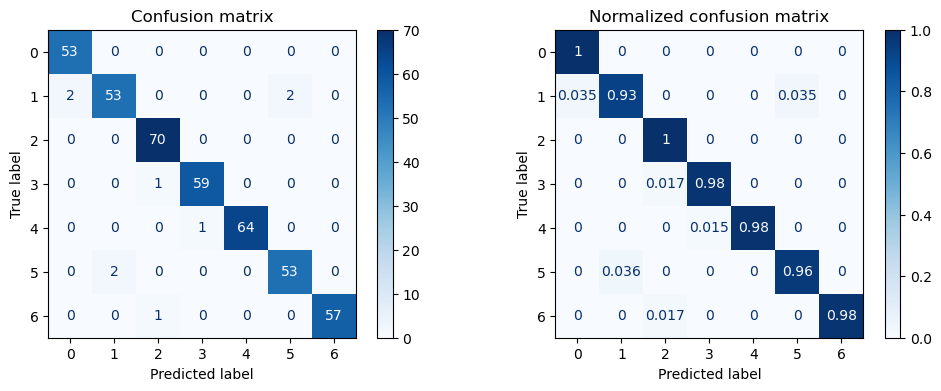

In [88]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

##### 8) Ensemble - XGBClassifier(Boosting)
- eval_set 파라미터에 전달하기 위한 검증 세트를 분리하고 진행합니다.

In [89]:
from sklearn.model_selection import train_test_split

X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)
evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [90]:
from xgboost import XGBClassifier

xgb_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=xgb_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-mlogloss:1.23312	validation_1-mlogloss:1.21042
[1]	validation_0-mlogloss:0.89009	validation_1-mlogloss:0.87438
[2]	validation_0-mlogloss:0.67916	validation_1-mlogloss:0.67067
[3]	validation_0-mlogloss:0.52642	validation_1-mlogloss:0.52034
[4]	validation_0-mlogloss:0.41882	validation_1-mlogloss:0.41459
[5]	validation_0-mlogloss:0.33200	validation_1-mlogloss:0.32784
[6]	validation_0-mlogloss:0.26598	validation_1-mlogloss:0.26303
[7]	validation_0-mlogloss:0.21811	validation_1-mlogloss:0.21662
[8]	validation_0-mlogloss:0.18080	validation_1-mlogloss:0.17833
[9]	validation_0-mlogloss:0.14920	validation_1-mlogloss:0.14890
[10]	validation_0-mlogloss:0.12515	validation_1-mlogloss:0.12627
[11]	validation_0-mlogloss:0.10655	validation_1-mlogloss:0.10809
[12]	validation_0-mlogloss:0.09156	validation_1-mlogloss:0.09311
[13]	validation_0-mlogloss:0.07913	validation_1-mlogloss:0.08102
[14]	validation_0-mlogloss:0.06668	validation_1-mlogloss:0.06910
[15]	validation_0-mlogloss:0.05858	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-mlogloss:0.01393	validation_1-mlogloss:0.01499
[32]	validation_0-mlogloss:0.01322	validation_1-mlogloss:0.01417
[33]	validation_0-mlogloss:0.01251	validation_1-mlogloss:0.01350
[34]	validation_0-mlogloss:0.01194	validation_1-mlogloss:0.01295
[35]	validation_0-mlogloss:0.01138	validation_1-mlogloss:0.01242
[36]	validation_0-mlogloss:0.01093	validation_1-mlogloss:0.01194
[37]	validation_0-mlogloss:0.01057	validation_1-mlogloss:0.01166
[38]	validation_0-mlogloss:0.01015	validation_1-mlogloss:0.01120
[39]	validation_0-mlogloss:0.00980	validation_1-mlogloss:0.01089
[40]	validation_0-mlogloss:0.00942	validation_1-mlogloss:0.01047
[41]	validation_0-mlogloss:0.00914	validation_1-mlogloss:0.01017
[42]	validation_0-mlogloss:0.00893	validation_1-mlogloss:0.00980
[43]	validation_0-mlogloss:0.00865	validation_1-mlogloss:0.00957
[44]	validation_0-mlogloss:0.00840	validation_1-mlogloss:0.00935
[45]	validation_0-mlogloss:0.00820	validation_1-mlogloss:0.00908
[46]	validation_0-mloglos

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [91]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(xgb_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.970013,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.970009,2
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.967464,4
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.966960,5
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.968995,3
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.966452,6
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.965949,7
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.965440,8
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.963404,10
9,"{'learning_rate': 1, 'n_estimators': 50}",0.964419,9


In [92]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[53  0  0  0  0  0  0]
 [ 2 53  0  0  0  2  0]
 [ 0  0 69  0  0  0  1]
 [ 0  0  1 59  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  2  0  0  0 52  1]
 [ 0  0  1  0  0  0 57]]
정확도: 0.9761, 정밀도: 0.9755, 재현율: 0.9753, F1: 0.9752
################################################################################


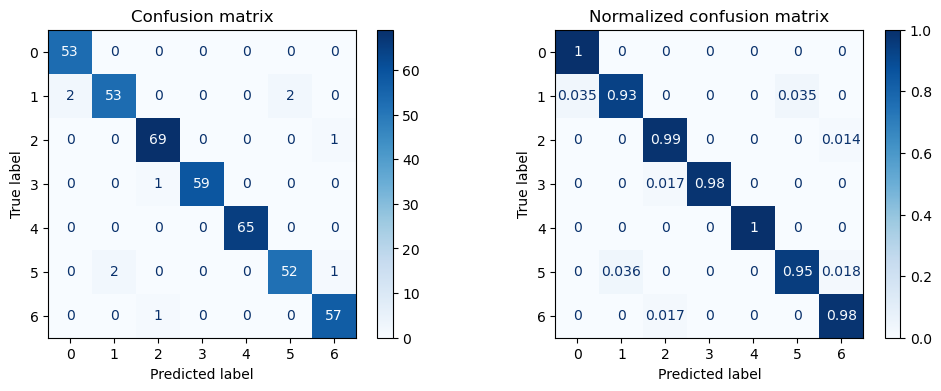

In [93]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

##### 9) Ensemble - LGBMClassifier(Boosting)
- 마찬가지로 검증 세트가 필요하므로 위에서 분리한 검증 세트를 사용합니다.

In [94]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lgbm_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2063
[LightGBM] [Info] Number of data points in the train set: 1967, number of used features: 16
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [95]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.972046,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.970015,2
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.967978,5
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.968997,3
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.968488,4
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.964419,9
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.967473,6
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.967471,7
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.964423,8
9,"{'learning_rate': 1, 'n_estimators': 50}",0.423262,11


In [96]:
lgbm = g_lgbm.best_estimator_
lgbm_prediction = lgbm.predict(X_test)

- 오차 행렬을 시각화해봅니다.

오차 행렬
[[53  0  0  0  0  0  0]
 [ 1 55  0  0  0  1  0]
 [ 0  0 70  0  0  0  0]
 [ 0  0  1 59  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  2  0  0  0 51  2]
 [ 0  0  0  0  0  1 57]]
정확도: 0.9809, 정밀도: 0.9801, 재현율: 0.9798, F1: 0.9798
################################################################################


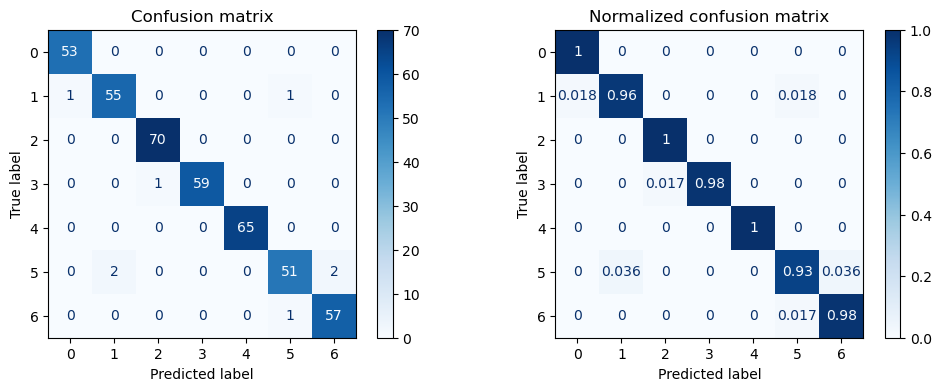

In [97]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

---
#### 4. 정확도 및 F1 Score 비교 시각화
- DTC, SVC, KNN, RFC 의 정확도 및 F1 Score를 시각화하여 비교합니다.
- Hard/Soft Voting의 각 정확도 및 F1 Score를 시각화하여 비교합니다.
- AdaBoost, GBC, XGBoost, LightGBM의 각 정확도 및 F1 Score를 시각화하여 비교합니다.

##### 1) DTC, SVC, KNN, RFC 의 정확도 및 F1 Score

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc_accuracy = accuracy_score(y_test, dtc_prediction)
svc_accuracy = accuracy_score(y_test, svc_prediction)
knn_accuracy = accuracy_score(y_test, knn_prediction)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)

dtc_precision = precision_score(y_test, dtc_prediction, average='macro')
svc_precision = precision_score(y_test, svc_prediction, average='macro')
knn_precision = precision_score(y_test, knn_prediction, average='macro')
rfc_precision = precision_score(y_test, rfc_prediction, average='macro')

dtc_recall = recall_score(y_test, dtc_prediction, average='macro')
svc_recall = recall_score(y_test, svc_prediction, average='macro')
knn_recall = recall_score(y_test, knn_prediction, average='macro')
rfc_recall = recall_score(y_test, rfc_prediction, average='macro')

dtc_f1 = f1_score(y_test, dtc_prediction, average='macro')
svc_f1 = f1_score(y_test, svc_prediction, average='macro')
knn_f1 = f1_score(y_test, knn_prediction, average='macro')
rfc_f1 = f1_score(y_test, rfc_prediction, average='macro')

models = ['DTC', 'SVC', 'KNN', 'RFC']
accuracy_scores = [dtc_accuracy, svc_accuracy, knn_accuracy, rfc_accuracy]
precisions = [dtc_precision, svc_precision, knn_precision, rfc_precision]
recalls = [dtc_recall, svc_recall, knn_recall, rfc_recall]
f1_scores = [dtc_f1, svc_f1, knn_f1, rfc_f1]

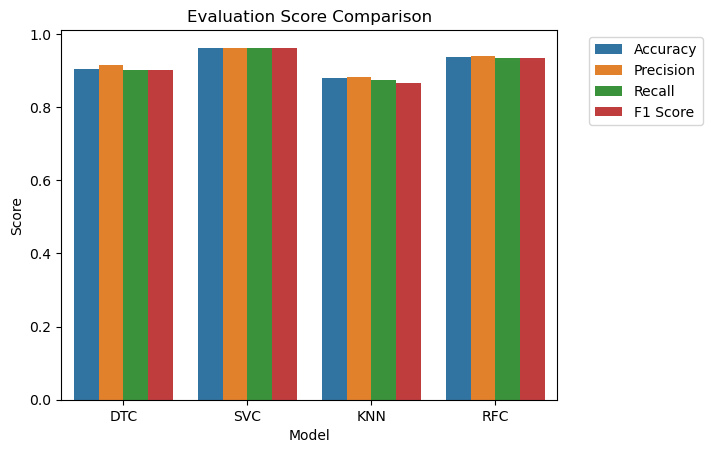

In [99]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [100]:
for i in range(4):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

DTC의 정확도: 90.4306%, 정밀도: 91.6129%, 재현율: 90.1929%, F1 Score: 90.2216%
SVC의 정확도: 96.1722%, 정밀도: 96.2055%, 재현율: 96.0736%, F1 Score: 96.0677%
KNN의 정확도: 87.799%, 정밀도: 88.3195%, 재현율: 87.5115%, F1 Score: 86.6598%
RFC의 정확도: 93.7799%, 정밀도: 93.8872%, 재현율: 93.4661%, F1 Score: 93.5273%


##### 2) Hard/Soft Voting Classifier의 정확도 및 F1 Score

In [101]:
hard_accuracy = accuracy_score(y_test, hard_vc_prediction)
soft_accuracy = accuracy_score(y_test, soft_vc_prediction)

hard_precision = precision_score(y_test, hard_vc_prediction, average='macro')
soft_precision = precision_score(y_test, soft_vc_prediction, average='macro')

hard_recall = recall_score(y_test, hard_vc_prediction, average='macro')
soft_recall = recall_score(y_test, soft_vc_prediction, average='macro')

hard_f1 = f1_score(y_test, hard_vc_prediction, average='macro')
soft_f1 = f1_score(y_test, soft_vc_prediction, average='macro')

models = ['Hard Voting', 'Soft Voting']
accuracy_scores = [hard_accuracy, soft_accuracy]
precisions = [hard_precision, soft_precision]
recalls = [hard_recall, soft_recall]
f1_scores = [hard_f1, soft_f1]

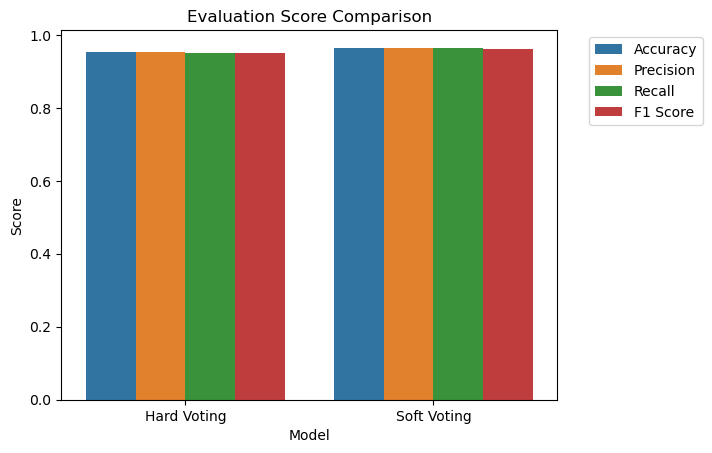

In [102]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [103]:
for i in range(2):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

Hard Voting의 정확도: 95.2153%, 정밀도: 95.413%, 재현율: 95.0202%, F1 Score: 95.0233%
Soft Voting의 정확도: 96.4115%, 정밀도: 96.4687%, 재현율: 96.2652%, F1 Score: 96.1857%


##### 3) AdaBoost, GBC, XGBoost, LightGBM의 정확도 및 F1 Score

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
ada_accuracy = accuracy_score(y_test, ada_prediction)
gbc_accuracy = accuracy_score(y_test, gbc_prediction)
xgb_accuracy = accuracy_score(y_test, xgb_prediction)
lgbm_accuracy = accuracy_score(y_test, lgbm_prediction)

ada_precision = precision_score(y_test, ada_prediction, average='macro')
gbc_precision = precision_score(y_test, gbc_prediction, average='macro')
xgb_precision = precision_score(y_test, xgb_prediction, average='macro')
lgbm_precision = precision_score(y_test, lgbm_prediction, average='macro')

ada_recall = recall_score(y_test, ada_prediction, average='macro')
gbc_recall = recall_score(y_test, gbc_prediction, average='macro')
xgb_recall = recall_score(y_test, xgb_prediction, average='macro')
lgbm_recall = recall_score(y_test, lgbm_prediction, average='macro')

ada_f1 = f1_score(y_test, ada_prediction, average='macro')
gbc_f1 = f1_score(y_test, gbc_prediction, average='macro')
xgb_f1 = f1_score(y_test, xgb_prediction, average='macro')
lgbm_f1 = f1_score(y_test, lgbm_prediction, average='macro')

models = ['AdaBoost', 'GBC', 'XGBoost', 'LightGBM']
accuracy_scores = [ada_accuracy, gbc_accuracy, xgb_accuracy, lgbm_accuracy]
precisions = [ada_precision, gbc_precision, xgb_precision, lgbm_precision]
recalls = [ada_recall, gbc_recall, xgb_recall, lgbm_recall]
f1_scores = [ada_f1, gbc_f1, xgb_f1, lgbm_f1]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


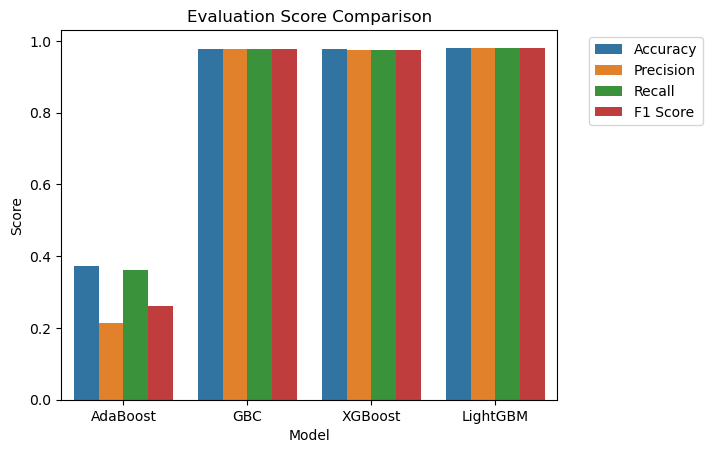

In [105]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

sns.barplot(data=df, x='Model', y='Score', hue='Metric')

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

In [106]:
for i in range(4):
    print(f'{models[i]}의 정확도: {round(accuracy_scores[i] * 100, 4)}%, 정밀도: {round(precisions[i] * 100, 4)}%, 재현율: {round(recalls[i] * 100, 4)}%, F1 Score: {round(f1_scores[i] * 100, 4)}%')

AdaBoost의 정확도: 37.3206%, 정밀도: 21.363%, 재현율: 36.266%, F1 Score: 26.025%
GBC의 정확도: 97.8469%, 정밀도: 97.8066%, 재현율: 97.7738%, F1 Score: 97.7764%
XGBoost의 정확도: 97.6077%, 정밀도: 97.5453%, 재현율: 97.5298%, F1 Score: 97.5245%
LightGBM의 정확도: 98.0861%, 정밀도: 98.0096%, 재현율: 97.9754%, F1 Score: 97.9839%


---
### 📌모델에 따른 평가 지표 점수  

<img src="./images/obesity_scores01.png" width="500px"><img src="./images/obesity_scores02.png" width="500px"><img src="./images/obesity_scores03.png" width="500px">

- DTC의 정확도: 90.4306%, 정밀도: 91.6129%, 재현율: 90.1929%, F1 Score: 90.2216%
- SVC의 정확도: 96.1722%, 정밀도: 96.2055%, 재현율: 96.0736%, F1 Score: 96.0677%
- KNN의 정확도: 87.799%, 정밀도: 88.3195%, 재현율: 87.5115%, F1 Score: 86.6598%
- RFC의 정확도: 93.7799%, 정밀도: 93.8872%, 재현율: 93.4661%, F1 Score: 93.5273%
- Hard Voting의 정확도: 95.2153%, 정밀도: 95.413%, 재현율: 95.0202%, F1 Score: 95.0233%
- Soft Voting의 정확도: 96.4115%, 정밀도: 96.4687%, 재현율: 96.2652%, F1 Score: 96.1857%
- AdaBoost의 정확도: 37.3206%, 정밀도: 21.363%, 재현율: 36.266%, F1 Score: 26.025%
- GBC의 정확도: 97.8469%, 정밀도: 97.8066%, 재현율: 97.7738%, F1 Score: 97.7764%
- XGBoost의 정확도: 97.6077%, 정밀도: 97.5453%, 재현율: 97.5298%, F1 Score: 97.5245%
- **LightGBM의 정확도: 98.0861%, 정밀도: 98.0096%, 재현율: 97.9754%, F1 Score: 97.9839%**

### 🎈Light Gradient Boosting Machine Classifier 모델의 성능이 가장 높게 나타났습니다.
- 오버 샘플링 없이 진행하였으나 AdaBoost를 제외한 모든 분류 모델의 평가 점수가 상당히 높게 나왔습니다.
- 따라서 오버 샘플링을 다시 진행할 필요는 없다고 판단되지만, **과적합이 발생했을 가능성이 높기 때문에**,  
  앞서 과적합 방지를 위해 하이퍼 파라미터 튜닝을 수행했던,
  평가 지표 점수는 더 낮지만 약 90%를 기록한 DTC 모델이 더 권장될 수 있습니다.

<img src="./images/obesity_lgbm_parameters.png">

- 실제로 GridSearchCV를 통해 하이퍼 파라미터 값 별로 훈련한 LightGBM 모델의 평가 지표를 보면,  
  0.96 이상이거나 0.4대로 극단적인 분포 양상을 띠는 사실을 확인할 수 있습니다.